K-Means - California Housing

In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn import tree
from sklearn.metrics import accuracy_score
from pickle import dump

1. DATA COLLECTION

In [51]:
df_raw = pd.read_csv("../data/raw/df_raw.csv")
df_raw.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


1.1. DATA CLEAN-UP

In [52]:
df_raw_filtered = df_raw[["MedInc", "Latitude", "Longitude"]]
df_raw_filtered.head()

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


In [53]:
# FILTERED TRAIN AND TEST
X_train, X_test = train_test_split(df_raw_filtered, test_size = 0.2, random_state = 42)
X_train.head()

,MedInc,Latitude,Longitude
14196,3.2596,32.71,-117.03
8267,3.8125,33.77,-118.16
17445,4.1563,34.66,-120.48
14265,1.9425,32.69,-117.11
2271,3.5542,36.78,-119.80


2. K-MEANS MODEL

In [54]:
# 2.1. TRAIN MODEL
model = KMeans(n_clusters = 6, random_state = 42)
model.fit(X_train)

KMeans(n_clusters=6, random_state=42)

In [55]:
# 2.2. INCLUDE CUSTERS IN NEW COLUMN
y_train = list(model.labels_)
X_train["Cluster"] = y_train
X_train.head()

,MedInc,Latitude,Longitude,Cluster
14196,3.2596,32.71,-117.03,3
8267,3.8125,33.77,-118.16,1
17445,4.1563,34.66,-120.48,1
14265,1.9425,32.69,-117.11,3
2271,3.5542,36.78,-119.80,5


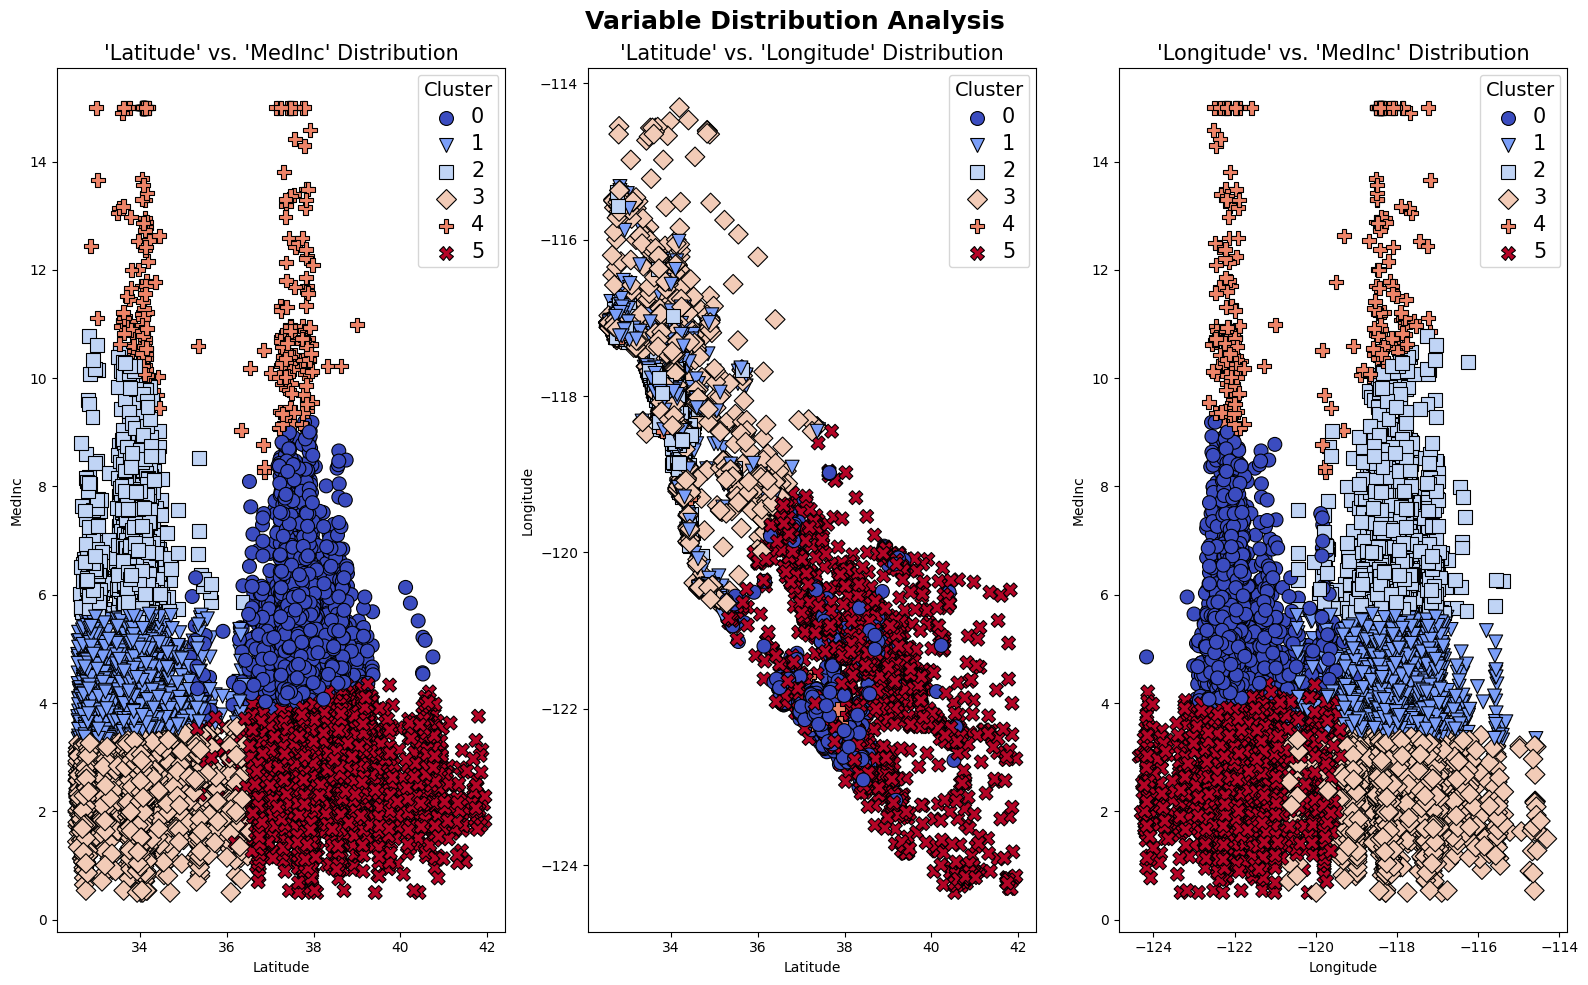

In [56]:
fig, axis = plt.subplots(1, 3, figsize=(16, 10))
fig.suptitle("Variable Distribution Analysis", fontsize=18, fontweight='bold')

markers = {0: "o", 1: "v", 2: "s", 3: "D", 4: "P", 5: "X"}  # All markers are filled
size = 100 

sns.scatterplot(ax=axis[0], data=X_train, x="Latitude", y="MedInc", hue="Cluster", palette="coolwarm",
                style="Cluster", markers=markers, size="Cluster", sizes={k: size for k in markers},
                legend="full", edgecolor="black", linewidth=0.8)

sns.scatterplot(ax=axis[1], data=X_train, x="Latitude", y="Longitude", hue="Cluster", palette="coolwarm",
                style="Cluster", markers=markers, size="Cluster", sizes={k: size for k in markers},
                legend="full", edgecolor="black", linewidth=0.8)

sns.scatterplot(ax=axis[2], data=X_train, x="Longitude", y="MedInc", hue="Cluster", palette="coolwarm",
                style="Cluster", markers=markers, size="Cluster", sizes={k: size for k in markers},
                legend="full", edgecolor="black", linewidth=0.8)

axis[0].set_title("'Latitude' vs. 'MedInc' Distribution", fontsize=15)
axis[1].set_title("'Latitude' vs. 'Longitude' Distribution", fontsize=15)
axis[2].set_title("'Longitude' vs. 'MedInc' Distribution", fontsize=15)

for ax in axis:
    legend = ax.get_legend()
    if legend:
        for text in legend.texts:
            text.set_fontsize(15)
        legend.set_title(legend.get_title().get_text(), prop={'size': 14})  # Increase font size of legend title

plt.tight_layout()
plt.show()


3. DATA PREDICTION TEST

In [57]:
y_test = list(model.predict(X_test))
X_test["Cluster"] = y_test
X_test.head()

,MedInc,Latitude,Longitude,Cluster
20046,1.6812,36.06,-119.01,3
3024,2.5313,35.14,-119.46,3
15663,3.4801,37.80,-122.44,5
20484,5.7376,34.28,-118.72,2
9814,3.7250,36.62,-121.93,5
